In [1]:
import numpy as np
import pandas as pd

In [2]:
myiris = pd.read_csv('iris-iic1005.csv', header=0)

In [3]:
myiris.tail()

sepallength  sepalwidth  petallength  petalwidth           class  \
145          6.7         3.0          5.2         2.3  Iris-virginica   
146          6.3         2.5          5.0         1.9  Iris-virginica   
147          6.5         3.0          5.2         2.0  Iris-virginica   
148          6.2         3.4          5.4         2.3  Iris-virginica   
149          5.9         3.0          5.1         1.8  Iris-virginica   

     class_numeric  
145              2  
146              2  
147              2  
148              2  
149              2

In [4]:
myiris.shape

(150, 6)

In [5]:
myiris.dtypes

sepallength      float64
sepalwidth       float64
petallength      float64
petalwidth       float64
class             object
class_numeric      int64
dtype: object

In [6]:
myiris['sepallength'].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepallength, dtype: float64

In [7]:
myiris.describe()

sepallength  sepalwidth  petallength  petalwidth  class_numeric
count   150.000000  150.000000   150.000000  150.000000     150.000000
mean      5.843333    3.054000     3.758667    1.198667       1.000000
std       0.828066    0.433594     1.764420    0.763161       0.819232
min       4.300000    2.000000     1.000000    0.100000       0.000000
25%       5.100000    2.800000     1.600000    0.300000       0.000000
50%       5.800000    3.000000     4.350000    1.300000       1.000000
75%       6.400000    3.300000     5.100000    1.800000       2.000000
max       7.900000    4.400000     6.900000    2.500000       2.000000

In [8]:
myiris.groupby('class').mean()

sepallength  sepalwidth  petallength  petalwidth  \
class                                                               
Iris-setosa            5.006       3.418        1.464       0.244   
Iris-versicolor        5.936       2.770        4.260       1.326   
Iris-virginica         6.588       2.974        5.552       2.026   

                 class_numeric  
class                           
Iris-setosa                  0  
Iris-versicolor              1  
Iris-virginica               2

In [9]:
print(myiris['class'][5])

Iris-setosa


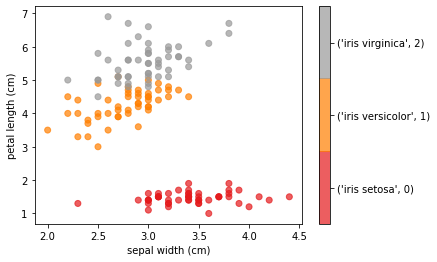

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# La siguiente funcion Formatter etiquetara la barra de colores 
# con los nombres correctos
leyenda = ['iris setosa','iris versicolor','iris virginica']
formatter = plt.FuncFormatter(lambda i, *args: (leyenda[int(i)],i) )

plt.scatter(myiris.sepalwidth, myiris.petallength,
            c=myiris.class_numeric, cmap=plt.cm.get_cmap('Set1', 3), alpha= 0.7)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel('sepal width (cm)')
plt.ylabel('petal length (cm)');


In [11]:
#!pip install sklearn

# K-nn classifier
from sklearn import neighbors
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [12]:
# Clase a predecir
y = myiris["class_numeric"]

# Seleccionar todas las columnas con datos
X = myiris.iloc[:,0:4]

In [13]:
# Crear instancia del clasificador
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [14]:
# Separar dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [15]:

# Darle los datos para "fit" del modelo
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
# clasifiquemos un ejemplo
# sepallength sepalwidth petallength petalwidth
X_pred = [3, 5, 4, 2]
result = knn.predict([X_pred, ])
print(result)


[1]


In [17]:
X_pred = [1, 2, 1, 0]
result = knn.predict([X_pred, ])
print(result)

[0]


In [18]:
X_pred = [7, 5, 5, 3]
result = knn.predict([X_pred, ])
print(result)

[2]


In [19]:
print(X_test.shape)

(45, 4)


In [20]:
predicted = knn.predict(X_test)

In [21]:
print(metrics.confusion_matrix(y_test, predicted))


[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [22]:
print( metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Opcion 2: cargar directo datos desde sklearn

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()

n_samples, n_features = iris.data.shape
print(iris.keys())
print((n_samples, n_features))
print(iris.data.shape)
print(iris.target.shape)
print(iris.target_names)
print(iris.feature_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(150, 4)
(150, 4)
(150,)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


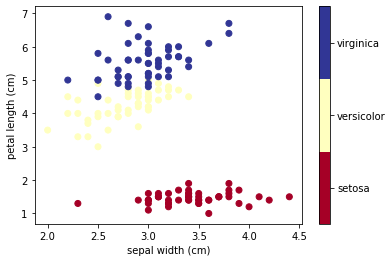

In [24]:
## EDA: Exploratory Data Analysis
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 'sepal width (cm)'
x_index = 1
# 'petal length (cm)'
y_index = 2

# La siguiente funcion Formatter etiquetara la barra de colores 
# con los nombres correctos
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

In [25]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=20, weights='uniform')

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
X_pred = [3, 5, 4, 2]
result = knn.predict([X_pred, ])

print(iris.target_names[result])
print(iris.target_names)
print(knn.predict_proba([X_pred, ]))

['versicolor']
['setosa' 'versicolor' 'virginica']
[[0.05 0.85 0.1 ]]


/Users/denisparra/environments/tf2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


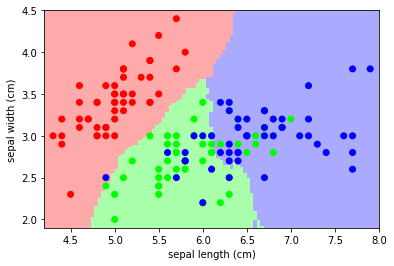

In [26]:
from fig_code import plot_iris_knn
plot_iris_knn(vecinos = 30)